POSIBLES PREGUNTAS:
- Relación entre el género(mujeres) con el tamaño de empresa.
- Herramientas más utilizadas segun el puesto: business o data.
- Título académico y salario.
- Paises: haceer un top10.


REPASAR:

Split, explode: lenguaje programación. Cantidad de gente que utiliza Python, SQL, R...



INICIAR LA PRESENTACIÓN: Historia de los perfiles de los analistas de datos: presentar a modo informativo y enlazarlo

    - ¿Cómo es el perfil de un analista y business?
    - ¿Hay diferencias entre el perfil de un business y un data?

¿A quién va dirigido el curso? ¿Qué ofrece?
    - Pais
    - Género
    - Salario
    - Herramientas: cuales utilizan los Business y los Data


Como es un perfil del Analista de Datos

¿A quién me quiero dirigir?
     - a mujeres (brecha género)
¿Su cv está adaptado a lo que pide el mercado?



GRAFICAS:

-Grafica 1: ¿A mayor edad mayor brecha de género? Comparar columnas edades y género.
-Grafica 2: Comparar lenguajes_programacion(top5).
-Grafica 3: ¿Dónde se está contratando a más gente de Business/Data? Ubicar España dentro de ese mercado de contratación.
-Gráfica 4: tamaño_empresa con brecha género.
-Gráfica 5: sector laboral con empresas (qué sector contrata a más bussines o data para que adalab enfoque sus proyectos en este sector)
-Gráfica 6: Salarios y género: buena pregunta.



In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [4]:
df = pd.read_csv('../datos/Dataframe_filtrado_data.csv', index_col= 0)
df.sample(10)

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion
6583,30-34,Man,Brazil,Bachelor’s degree,Data Analyst,< 1 years,A laptop,Manufacturing/Fabrication,250-999 employees,"7,500-9,999",NaN,"R, SQL, Javascript","RStudio , Sublime Text,Jupyter Notebook","Ggplot / ggplot2 ,Shiny , Other",Analyze and understand data to influence produ...,GitHub
12288,40-44,Man,Greece,Master’s degree,Business Analyst,< 1 years,A laptop,Computers/Technology,"1000-9,999 employees","15,000-19,999",NaN,"Python, SQL",Jupyter Notebook,Matplotlib,Analyze and understand data to influence produ...,NaN
17987,50-54,Man,Germany,Master’s degree,Data Analyst,20+ years,A laptop,Manufacturing/Fabrication,"10,000 or more employees","100,000-124,999",MySQL,"Python, SQL, C, C++, Java, Javascript, Swift, ...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Analyze and understand data to influence produ...,Plotly Dash GitHub Kaggle
4498,25-29,Man,Nigeria,Master’s degree,Business Analyst,< 1 years,A personal computer / desktop,Marketing/CRM,0-49 employees,$0-999,NaN,"Python, SQL","Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...","Matplotlib ,Seaborn",Analyze and understand data to influence produ...,NaN
20542,60-69,Man,Mexico,Master’s degree,Business Analyst,20+ years,A laptop,Other,0-49 employees,"40,000-49,999",NaN,"R, SQL, Other",RStudio,Ggplot / ggplot2,Analyze and understand data to influence produ...,NaN
1681,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,A laptop,Computers/Technology,50-249 employees,"4,000-4,999",Microsoft Azure SQL Database,"Python, R","RStudio ,Visual Studio Code (VSCode) ,PyCharm ...","Matplotlib ,Seaborn ,Ggplot / ggplot2",Analyze and understand data to influence produ...,GitHub
25221,18-21,Man,India,Master’s degree,Data Analyst,I have never written code,NaN,Academics/Education,0-49 employees,"250,000-299,999",NaN,NaN,NaN,NaN,Experimentation and iteration to improve exis...,NaN
5057,45-49,Man,Japan,No formal education past high school,Data Analyst,10-20 years,"A cloud computing platform (AWS, Azure, GCP, h...",Computers/Technology,"1000-9,999 employees","80,000-89,999",NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Matplotlib,Analyze and understand data to influence produ...,GitHub Kaggle
6314,30-34,Man,Nigeria,Master’s degree,Data Analyst,1-3 years,A laptop,Broadcasting/Communications,"1000-9,999 employees",$0-999,MySQL,"Python, R, SQL","RStudio ,PyCharm , Spyder, Notepad++, Sublime ...","Matplotlib ,Seaborn ,Ggplot / ggplot2",Analyze and understand data to influence produ...,GitHub Kaggle
23026,18-21,Man,India,Bachelor’s degree,Data Analyst,< 1 years,A laptop,Other,0-49 employees,NaN,NaN,"Python, SQL, C, C++","Visual Studio Code (VSCode) ,PyCharm ,Jupyter ...","Matplotlib ,Seaborn",NaN,NaN


In [5]:
# Función con todas las propiedades para hacer una exploración inicial de los dataframes.
def df_exploracion(dataframe):
     """
     Esta función realiza una exploración del dataframe
     Args: dataframe (recibe un parámetro que es el dataframe a explorar).
     """
     print(f"Tamaño del DataFrame: {dataframe.size}")
     print("---------")
     print(f"(El número de filas y columnas del DataFrame: {dataframe.shape}")
     print("----------")
     print(f"Descripción estadística del DataFrame:")
     display(dataframe.describe())
     print("--------")
     print(f"Información general del DataFrame:")
     display(dataframe.info())
     print("--------")
     print(f"Las columnas de este DataFrame son {dataframe.columns}")
     print("----------")
     print(f"Tipo de dato de las columnas de este DataFrame:{dataframe.dtypes}")

In [6]:
df_exploracion(df)

Tamaño del DataFrame: 52304
---------
(El número de filas y columnas del DataFrame: (3269, 16)
----------
Descripción estadística del DataFrame:


,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion
count,3269,3269,3269,3269,3269,3269,2980,3111,3092,2924,807,2994,2991,2924,2971,1659
unique,11,5,66,7,2,7,6,18,5,26,20,250,474,208,73,90
top,25-29,Man,India,Master’s degree,Data Analyst,1-3 years,A laptop,Computers/Technology,0-49 employees,$0-999,MySQL,"Python, SQL",Jupyter Notebook,"Matplotlib ,Seaborn",Analyze and understand data to influence produ...,I do not share my work publicly
freq,788,2538,795,1514,2301,991,2082,550,908,679,206,622,377,602,1117,610


--------
Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3269 entries, 16 to 25972
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      3269 non-null   object
 1   gender                   3269 non-null   object
 2   paises                   3269 non-null   object
 3   titulo_academico         3269 non-null   object
 4   puesto_trabajo           3269 non-null   object
 5   años_experiencia         3269 non-null   object
 6   plataforma_informatica   2980 non-null   object
 7   sector_laboral           3111 non-null   object
 8   tamaño_empresa           3092 non-null   object
 9   salario                  2924 non-null   object
 10  servidor_datos           807 non-null    object
 11  lenguaje_programacion    2994 non-null   object
 12  entorno_desarrollo       2991 non-null   object
 13  libreria_visualizacion   2924 non-null   object

None

--------
Las columnas de este DataFrame son Index(['age', 'gender', 'paises', 'titulo_academico', 'puesto_trabajo',
       'años_experiencia', 'plataforma_informatica', 'sector_laboral',
       'tamaño_empresa', 'salario', 'servidor_datos', 'lenguaje_programacion',
       'entorno_desarrollo', 'libreria_visualizacion', 'funciones_puesto',
       'herramienta_publicacion'],
      dtype='object')
----------
Tipo de dato de las columnas de este DataFrame:age                        object
gender                     object
paises                     object
titulo_academico           object
puesto_trabajo             object
años_experiencia           object
plataforma_informatica     object
sector_laboral             object
tamaño_empresa             object
salario                    object
servidor_datos             object
lenguaje_programacion      object
entorno_desarrollo         object
libreria_visualizacion     object
funciones_puesto           object
herramienta_publicacion    object


Vamos a categorizar columnas:

In [7]:
categoria_sueldo = df["salario"].unique()

In [8]:
df["salario"].replace(r",", ".",regex = True, inplace= True)

In [9]:
df["salario"].unique()

array(['2.000-2.999', nan, '7.500-9.999', '$0-999', '25.000-29.999',
       '60.000-69.999', '20.000-24.999', '1.000-1.999', '100.000-124.999',
       '125.000-149.999', '5.000-7.499', '70.000-79.999', '10.000-14.999',
       '30.000-39.999', '15.000-19.999', '3.000-3.999', '4.000-4.999',
       '40.000-49.999', '200.000-249.999', '80.000-89.999',
       '50.000-59.999', '150.000-199.999', '90.000-99.999',
       '250.000-299.999', '>$1.000.000', '300.000-499.999',
       '$500.000-999.999'], dtype=object)

In [10]:
df["salario"].value_counts()

$0-999              679
1.000-1.999         243
10.000-14.999       207
5.000-7.499         158
7.500-9.999         140
30.000-39.999       135
40.000-49.999       125
50.000-59.999       119
2.000-2.999         117
15.000-19.999       116
20.000-24.999       113
60.000-69.999       109
100.000-124.999     108
4.000-4.999         102
70.000-79.999        92
3.000-3.999          91
25.000-29.999        83
80.000-89.999        68
90.000-99.999        46
125.000-149.999      32
150.000-199.999      17
200.000-249.999       9
>$1.000.000           6
250.000-299.999       5
300.000-499.999       3
$500.000-999.999      1
Name: salario, dtype: int64

In [11]:
salario_junior = ['0-999', '1.000-1.999', '10.000-14.999',
        '5.000-7.499', '2.000-2.999', '7.500-9.999','4.000-4.999', '3.000-3.999'
    ]

In [12]:
salario_mid = [ '30.000-39.999', '20.000-24.999', 
        '15.000-19.999',  '25.000-29.999', 
    ]

In [13]:
salario_senior = [ '100.000-124.999','50.000-59.999', '40.000-49.999','60.000-69.999', '70.000-79.999',
        '150.000-199.999', '80.000-89.999', '125.000-149.999',
        '90.000-99.999', '200.000-249.999', '300.000-499.999', '250.000-299.999',
        '>$1.000.000', '$500.000-999.999'
    ]

In [14]:
def cat_salarios(salario):
    dicti = {"bajo": salario_junior, "medio": salario_mid, "alto": salario_senior}
    resultado = "Desconocido" 

    for k, v in dicti.items():
        if salario in v:
            resultado = k
            
    return resultado

In [15]:
df["salarios_cat"] = df["salario"].apply(cat_salarios)


In [16]:
df.head(5)

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,Desconocido
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,Desconocido
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio


In [17]:
df["tamaño_empresa"].unique()

array(['1000-9,999 employees', '250-999 employees', '0-49 employees',
       '50-249 employees', '10,000 or more employees', nan], dtype=object)

In [18]:
df["tamaño_empresa"].value_counts()

0-49 employees              908
10,000 or more employees    693
1000-9,999 employees        589
50-249 employees            495
250-999 employees           407
Name: tamaño_empresa, dtype: int64

In [19]:
def cat_empresa(tamaño_empresa):
    try:
        if tamaño_empresa ==  "0-49 employees":
            return "Startup"
        elif tamaño_empresa ==  "50-249 employees":
            return "Pequeña"
        elif tamaño_empresa ==  "250-999 employees":
            return "Mediana"
        elif tamaño_empresa ==  "1000-9,999 employees":
            return "Grande"
        elif tamaño_empresa ==  "10,000 or more employees":
            return "Multinacional"
        
    except:
        return tamaño_empresa

In [20]:
df["empresa_cat"] = df["tamaño_empresa"].apply(cat_empresa)

In [21]:
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,Desconocido,Mediana
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,Desconocido,Startup
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana


Tratamiento nulos:

In [22]:
df.isnull().sum()*100 / df.shape[0]

age                         0.000000
gender                      0.000000
paises                      0.000000
titulo_academico            0.000000
puesto_trabajo              0.000000
años_experiencia            0.000000
plataforma_informatica      8.840624
sector_laboral              4.833282
tamaño_empresa              5.414500
salario                    10.553686
servidor_datos             75.313552
lenguaje_programacion       8.412359
entorno_desarrollo          8.504130
libreria_visualizacion     10.553686
funciones_puesto            9.115938
herramienta_publicacion    49.250535
salarios_cat                0.000000
empresa_cat                 5.414500
dtype: float64

In [23]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript', nan,
       'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javascript', 'Python, S

In [24]:
df_lenguajes = pd.DataFrame(df["lenguaje_programacion"].value_counts())
df_lenguajes.head()

,lenguaje_programacion
"Python, SQL",622
Python,481
"Python, R, SQL",319
"Python, R",140
SQL,114


In [25]:
# Creamos una funcion que dividirá los strings de la columna lenguajes_programacion
def split_string(lenguajes):
    try:
        return [lenguaje.strip() for lenguaje in lenguajes.split(',')]
    except:
        return ["sin responder"]

In [26]:
df["lenguaje_programacion"].unique()

array(['Python, SQL', ' R', 'Python',
       'Python, SQL, C, C++, Java, Javascript, MATLAB', ' R, SQL',
       'Python, SQL, Other', ' SQL, C++', ' R, SQL, C++', ' SQL',
       'Python, SQL, Javascript', 'Python, SQL, C, Javascript', nan,
       'Python, SQL, C++, Other', 'Python, R, SQL',
       'Python, R, SQL, C, C++', 'Python, R', ' C++', 'Python, R, Other',
       ' None', 'Python, SQL, Java, Javascript', 'Python, R, MATLAB',
       'Python, R, SQL, C++, MATLAB', 'Python, SQL, C++',
       'Python, SQL, Javascript, Other', 'Python, R, SQL, MATLAB',
       'Python, SQL, MATLAB', 'Python, R, C, C++', 'Python, Javascript',
       'Python, SQL, Javascript, Bash', ' C, C++, MATLAB', 'Python, Java',
       ' SQL, Java', 'Python, R, SQL, Other',
       'Python, SQL, C++, Javascript, Bash', 'Python, C++, Java, MATLAB',
       'Python, Javascript, Other', 'Python, R, SQL, Javascript',
       'Python, C', 'Python, R, SQL, C, C++, Java',
       'Python, R, SQL, Java, Javascript', 'Python, S

In [27]:
df["lenguaje_programacion"].value_counts()

Python, SQL                                        622
Python                                             481
Python, R, SQL                                     319
Python, R                                          140
 SQL                                               114
                                                  ... 
Python, R, SQL, C, C++, Java, Javascript, Other      1
Python, R, Javascript, Bash                          1
Python, C, C++, Java, Other                          1
Python, R, SQL, Swift                                1
Python, R, SQL, Java, Javascript, Other              1
Name: lenguaje_programacion, Length: 250, dtype: int64

In [28]:
# Aplicamos la función para crear una nueva columna llamada 'lenguajes separados'
#En esta nueva columna pasamos de tener un único string a tener una lista de strings
df['lenguajes_separados'] = df['lenguaje_programacion'].apply(split_string)
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande,"[Python, SQL]"
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,Desconocido,Mediana,[R]
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python]
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,Desconocido,Startup,"[Python, SQL, C, C++, Java, Javascript, MATLAB]"
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[R, SQL]"


In [29]:
# Contamos la frecuencia de cada lenguaje
#Creamos un diccionario en el que tendremos el conteo

conteo_lenguajes = {}
for lenguajes in df['lenguajes_separados']:
    
    
        for lenguaje in lenguajes:
            if lenguaje in conteo_lenguajes:
                conteo_lenguajes[lenguaje] += 1
            else:
                conteo_lenguajes[lenguaje] = 1
print(conteo_lenguajes)

{'Python': 2465, 'SQL': 1866, 'R': 928, 'C': 240, 'C++': 288, 'Java': 300, 'Javascript': 327, 'MATLAB': 230, 'Other': 300, 'sin responder': 275, 'None': 59, 'Bash': 131, 'Julia': 21, 'Swift': 20}


In [30]:
df_conteo_lenguajes = pd.DataFrame(conteo_lenguajes, index = [0]) 
df_conteo_lenguajes 

,Python,SQL,R,C,C++,Java,Javascript,MATLAB,Other,sin responder,None,Bash,Julia,Swift
0,2465,1866,928,240,288,300,327,230,300,275,59,131,21,20


In [31]:
df_conteo_lenguajes.sum().sort_values(ascending = False).iloc[:10].reset_index()

,index,0
0,Python,2465
1,SQL,1866
2,R,928
3,Javascript,327
4,Java,300
5,Other,300
6,C++,288
7,sin responder,275
8,C,240
9,MATLAB,230


In [32]:
df.select_dtypes

<bound method DataFrame.select_dtypes of          age     gender                    paises  \
16     50-54        Man                   Belgium   
32     22-24  Nonbinary  United States of America   
33     30-34      Woman                     Egypt   
46     22-24        Man                     China   
52     40-44        Man              South Africa   
...      ...        ...                       ...   
25959  18-21        Man                     India   
25965  18-21        Man                     India   
25966  30-34        Man                     India   
25968  30-34        Man                     Egypt   
25972  18-21        Man                     India   

                                        titulo_academico    puesto_trabajo  \
16                                     Bachelor’s degree      Data Analyst   
32     Some college/university study without earning ...      Data Analyst   
33                                     Bachelor’s degree      Data Analyst   
46     Som

In [33]:
df["servidor_datos"].unique()

array([nan, 'Oracle Database ', 'IBM Db2 ', 'Snowflake ', 'PostgreSQL ',
       'Google Cloud BigQuery ', 'Microsoft Azure SQL Database ',
       'SQLite ', 'Microsoft SQL Server ', 'MySQL ', 'MongoDB ',
       'Google Cloud SQL ', 'Amazon Redshift ', 'Amazon DynamoDB ',
       'Google Cloud Spanner ', 'Google Cloud BigTable ', 'Other',
       'Microsoft Azure Cosmos DB ', 'Google Cloud Firestore ',
       'Amazon RDS ', 'Amazon Aurora '], dtype=object)

In [48]:
df["age"].unique()

array(['50-54', '22-24', '30-34', '40-44', '70+', '45-49', '18-21',
       '55-59', '25-29', '35-39', '60-69'], dtype=object)

In [42]:
def cat_edad(age):
    
    try:
        if age in  ["18-21","22-24", "25-29"]:
            return "18-29"
        elif age in  ["30-34", '35-39', '40-44'] :
            return "30-44"
        elif age in  ["45-49", '50-54','55-59'] :
            return "45-59"
        elif age in  ["60-69", '70+']:
            return "60-70+"
        
    except:
        return age

In [44]:
df['edades'] = df['age'].apply(cat_edad)
df.head()

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados,edades
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,A laptop,Energy/Mining,"1000-9,999 employees",2.000-2.999,NaN,"Python, SQL","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,bajo,Grande,"[Python, SQL]",45-59
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Manufacturing/Fabrication,250-999 employees,NaN,NaN,R,RStudio,Ggplot / ggplot2,NaN,NaN,Desconocido,Mediana,[R],18-29
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,A laptop,Non-profit/Service,0-49 employees,7.500-9.999,NaN,Python,"Notepad++,Jupyter Notebook",None,Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python],30-44
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,A personal computer / desktop,Computers/Technology,0-49 employees,$0-999,NaN,"Python, SQL, C, C++, Java, Javascript, MATLAB","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,Desconocido,Startup,"[Python, SQL, C, C++, Java, Javascript, MATLAB]",18-29
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,A laptop,Manufacturing/Fabrication,250-999 employees,25.000-29.999,NaN,"R, SQL","RStudio ,Jupyter Notebook","Plotly / Plotly Express ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[R, SQL]",30-44


In [47]:
df["edades"].unique()

array(['45-59', '18-29', '30-44', '60-70+'], dtype=object)

In [49]:
df["paises"].unique()

array(['Belgium', 'United States of America', 'Egypt', 'China',
       'South Africa', 'Other', 'India', 'Israel', 'Colombia', 'Austria',
       'Brazil', 'Japan', 'Russia', 'Ukraine', 'Pakistan', 'Canada',
       'Nigeria', 'Mexico', 'Tunisia', 'Italy', 'Poland', 'Spain',
       'Indonesia', 'Sri Lanka',
       'United Kingdom of Great Britain and Northern Ireland', 'Turkey',
       'Kenya', 'Iran, Islamic Republic of...', 'South Korea', 'Peru',
       'Viet Nam', 'United Arab Emirates', 'Germany', 'France', 'Greece',
       'Taiwan', 'Portugal', 'Australia', 'Philippines', 'Saudi Arabia',
       'Singapore', 'Chile', 'Netherlands', 'Argentina', 'Ghana',
       'Morocco', 'Thailand', 'Switzerland', 'Hong Kong (S.A.R.)',
       'Ecuador', 'Bangladesh', 'Malaysia', 'Romania', 'Norway',
       'Ethiopia', 'Czech Republic',
       'I do not wish to disclose my location', 'Ireland', 'Sweden',
       'Kazakhstan', 'Iraq', 'Algeria', 'Denmark', 'Uganda', 'Belarus',
       'Nepal'], dtype=obj

In [58]:
df_top5_paises = pd.DataFrame(df["paises"].value_counts()).iloc[:10]
df_top5_paises 

,paises
India,795
United States of America,367
Other,181
Nigeria,132
China,121
Brazil,110
Russia,108
Egypt,101
Japan,84
United Kingdom of Great Britain and Northern Ireland,77


In [68]:
df_españa = df[(df["paises"] == "Spain")]
df_españa

,age,gender,paises,titulo_academico,puesto_trabajo,años_experiencia,plataforma_informatica,sector_laboral,tamaño_empresa,salario,servidor_datos,lenguaje_programacion,entorno_desarrollo,libreria_visualizacion,funciones_puesto,herramienta_publicacion,salarios_cat,empresa_cat,lenguajes_separados,edades
396,50-54,Man,Spain,Bachelor’s degree,Data Analyst,1-3 years,A personal computer / desktop,Online Service/Internet-based Services,50-249 employees,60.000-69.999,Google Cloud BigQuery,R,RStudio,Ggplot / ggplot2,Analyze and understand data to influence produ...,GitHub,alto,Pequeña,[R],45-59
1385,45-49,Man,Spain,Bachelor’s degree,Data Analyst,5-10 years,"A deep learning workstation (NVIDIA GTX, Lambd...",Government/Public Service,"1000-9,999 employees",60.000-69.999,NaN,"Python, SQL, Bash","Notepad++,Jupyter Notebook","Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,NaN,alto,Grande,"[Python, SQL, Bash]",45-59
1961,25-29,Man,Spain,Some college/university study without earning ...,Data Analyst,3-5 years,A laptop,Retail/Sales,250-999 employees,25.000-29.999,Microsoft Azure SQL Database,"Python, SQL",PyCharm,"Plotly / Plotly Express ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,medio,Mediana,"[Python, SQL]",18-29
2902,40-44,Man,Spain,Master’s degree,Data Analyst,10-20 years,A laptop,Accounting/Finance,250-999 employees,20.000-24.999,Microsoft SQL Server,"Python, R, SQL","RStudio , Spyder,Jupyter Notebook","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Analyze and understand data to influence produ...,GitHub,medio,Mediana,"[Python, R, SQL]",30-44
3422,25-29,Woman,Spain,Bachelor’s degree,Data Analyst,1-3 years,A personal computer / desktop,Medical/Pharmaceutical,"1000-9,999 employees",40.000-49.999,PostgreSQL,SQL,"Visual Studio Code (VSCode) ,PyCharm",None,Analyze and understand data to influence produ...,I do not share my work publicly,alto,Grande,[SQL],18-29
3852,25-29,Man,Spain,Bachelor’s degree,Data Analyst,1-3 years,A laptop,Energy/Mining,"10,000 or more employees",40.000-49.999,NaN,"Python, SQL",Jupyter Notebook,"Matplotlib ,Seaborn ,Plotly / Plotly Express",Analyze and understand data to influence produ...,I do not share my work publicly,alto,Multinacional,"[Python, SQL]",18-29
4249,50-54,Man,Spain,No formal education past high school,Data Analyst,< 1 years,A laptop,Academics/Education,0-49 employees,2.000-2.999,NaN,Python,Visual Studio Code (VSCode),"Matplotlib ,Seaborn ,Ggplot / ggplot2",Analyze and understand data to influence produ...,I do not share my work publicly,bajo,Startup,[Python],45-59
5922,45-49,Man,Spain,Doctoral degree,Business Analyst,20+ years,A laptop,Energy/Mining,50-249 employees,50.000-59.999,PostgreSQL,"Python, SQL, Java, Javascript","Visual Studio Code (VSCode) ,PyCharm , Notepad...","Matplotlib ,Seaborn ,Plotly / Plotly Express ...",Analyze and understand data to influence produ...,I do not share my work publicly,alto,Pequeña,"[Python, SQL, Java, Javascript]",45-59
6092,50-54,Man,Spain,Doctoral degree,Data Analyst,20+ years,A personal computer / desktop,Academics/Education,250-999 employees,50.000-59.999,NaN,"Python, R, C++, MATLAB, Other","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Matplotlib ,Ggplot / ggplot2 ,Shiny",Analyze and understand data to influence produ...,I do not share my work publicly,alto,Mediana,"[Python, R, C++, MATLAB, Other]",45-59
6132,35-39,Man,Spain,Master’s degree,Data Analyst,10-20 years,A personal computer / desktop,Computers/Technology,50-249 employees,NaN,NaN,"Python, R, SQL, C++, Java, Bash","RStudio , Spyder, Notepad++,Jupyter Notebook","Matplotlib ,Seaborn",Analyze and understand data to influence produ...,NaN,Desconocido,Pequeña,"[Python, R, SQL, C++, Java, Bash]",30-44


In [70]:
df.dtypes

age                        object
gender                     object
paises                     object
titulo_academico           object
puesto_trabajo             object
años_experiencia           object
plataforma_informatica     object
sector_laboral             object
tamaño_empresa             object
salario                    object
servidor_datos             object
lenguaje_programacion      object
entorno_desarrollo         object
libreria_visualizacion     object
funciones_puesto           object
herramienta_publicacion    object
salarios_cat               object
empresa_cat                object
lenguajes_separados        object
edades                     object
dtype: object

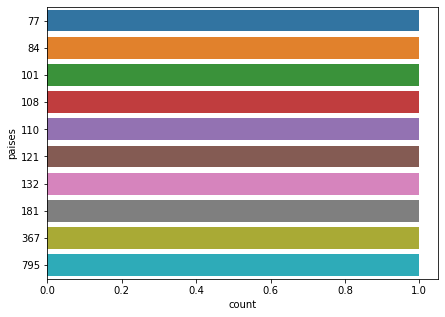

In [71]:
plt.figure(figsize=(7,5))

fig = sns.countplot(y = 'paises', data = df_top5_paises)